In [2]:
from google.colab import files
files.upload()


Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


{'winequality-red.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.9;0.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

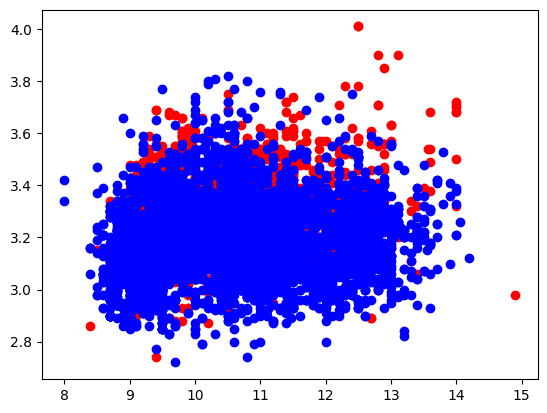

In [3]:

df1 = pd.read_csv('winequality-red.csv', delimiter = ';')
df1['type'] = 'red'
df2 = pd.read_csv('winequality-white.csv',delimiter = ';')
df2['type'] = 'white'
plt.scatter(df1['alcohol'],df1['pH'] ,color = 'red', label = 'red wine')
plt.scatter(df2['alcohol'],df2['pH'] ,color = 'blue', label = 'white wine')

plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
red_wine['type']='red'
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';')
white_wine['type']='white'
dfs = [red_wine, white_wine]
merged = pd.concat(dfs)
merged.dropna()
merged

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[6497 rows x 13 columns]

In [20]:
#encoding
label_encoder = preprocessing.LabelEncoder()

merged['type'] = label_encoder.fit_transform(merged['type'])

#train test split

X = merged.drop(['type'], axis=1)
y = merged['type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 3721 entries, 37 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3721 non-null   float64
 1   volatile acidity      3721 non-null   float64
 2   citric acid           3721 non-null   float64
 3   residual sugar        3721 non-null   float64
 4   chlorides             3721 non-null   float64
 5   free sulfur dioxide   3721 non-null   float64
 6   total sulfur dioxide  3721 non-null   float64
 7   density               3721 non-null   float64
 8   pH                    3721 non-null   float64
 9   sulphates             3721 non-null   float64
 10  alcohol               3721 non-null   float64
 11  quality               3721 non-null   int64  
 12  type                  3721 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 407.0+ KB


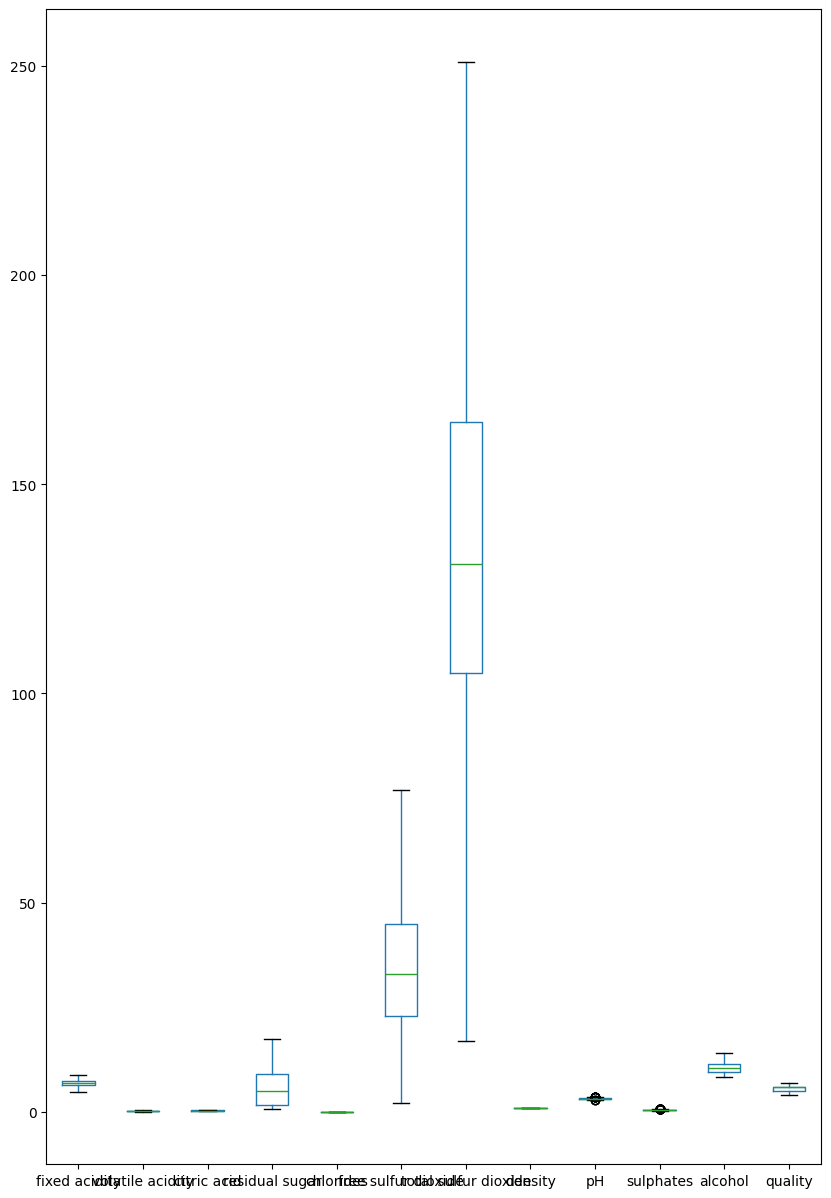

In [7]:
#1. IQR method for outlier removal

def remove_outliers_iqr(df, column):

    #calculate iqr, lower and upper bound
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

columns_of_interest = ['alcohol', 'pH', 'quality', 'residual sugar', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'sulphates', 'fixed acidity', 'volatile acidity', 'citric acid']

for column in columns_of_interest:
    merged = remove_outliers_iqr(merged, column)



#2. Z-SCORE for removing remaining outliers

def remove_outliers_zscore(df, column):

    z_score = np.abs((df[column] - df[column].mean()) / df[column].std())
    df = df[z_score < 3]
    return df

columns_of_interest = ['alcohol', 'pH', 'quality', 'residual sugar', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'sulphates', 'fixed acidity', 'volatile acidity', 'citric acid']

for column in columns_of_interest:
    merged = remove_outliers_zscore(merged, column)

merged.boxplot(grid=False, figsize = (10,15))
merged.info()


#data visualization
#1. box plot
#2. bar graph
#3. line chart
#4. pie chart

([<matplotlib.patches.Wedge at 0x78573fc19f50>,
 [Text(-0.052916343621325634, -1.0987264721384253, 'white'),
  Text(0.0529163114743899, 1.0987264736866704, 'red')],
 [Text(-0.028863460157086705, -0.5993053484391411, '98.5%'),
  Text(0.02886344262239449, 0.5993053492836383, '1.5%')])

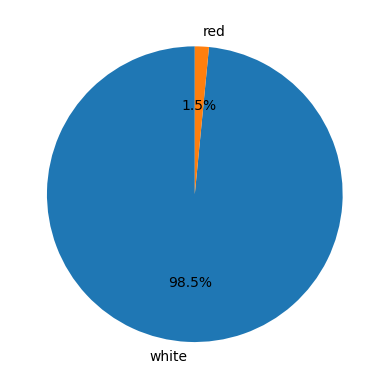

In [11]:
plt.pie(merged['type'].value_counts(), labels = merged['type'].value_counts().index,autopct='%1.1f%%', startangle=90)

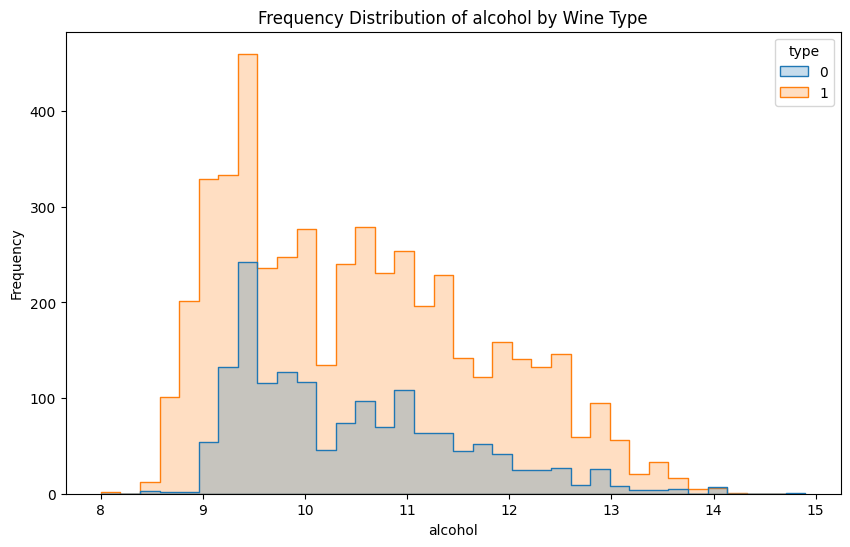

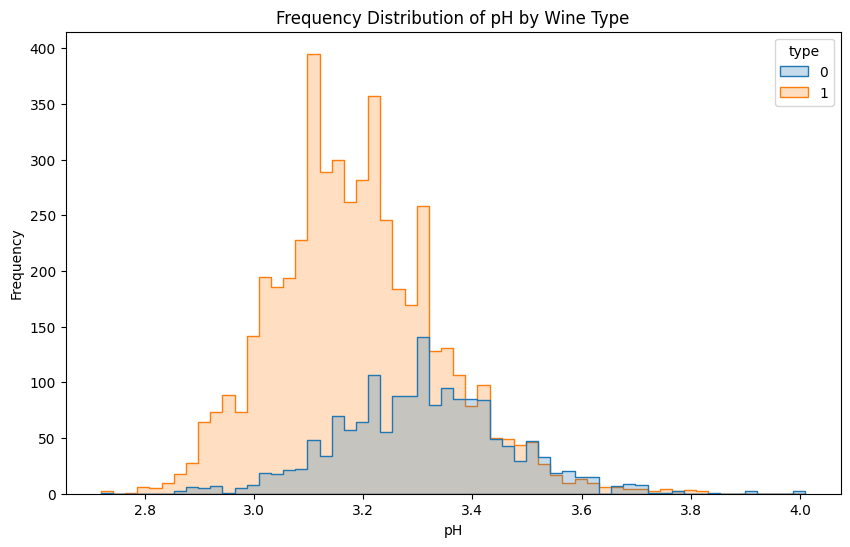

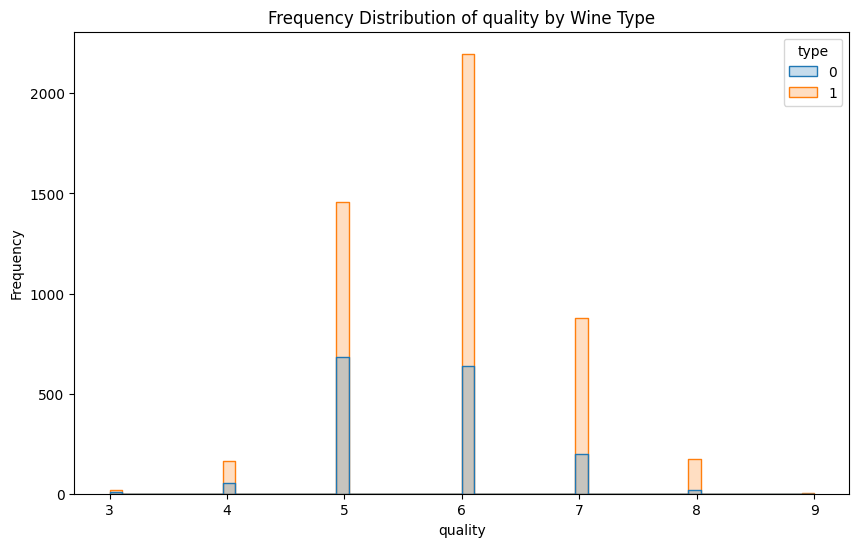

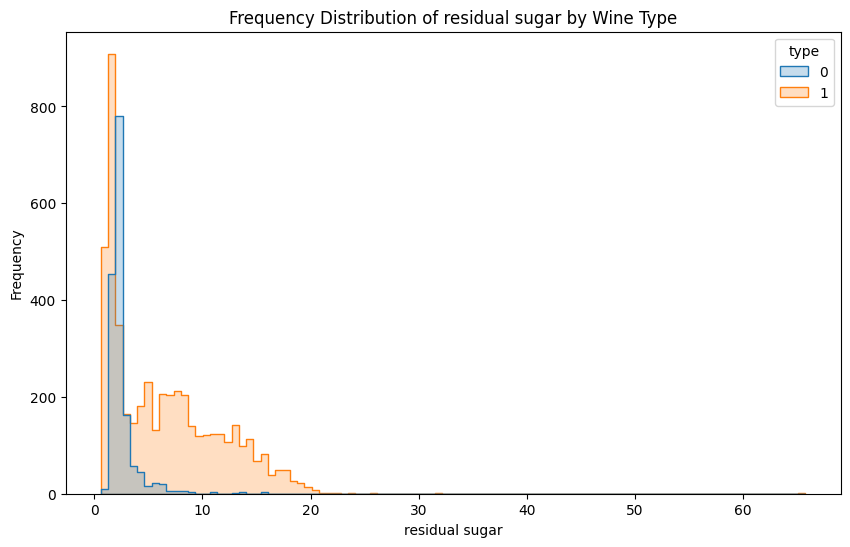

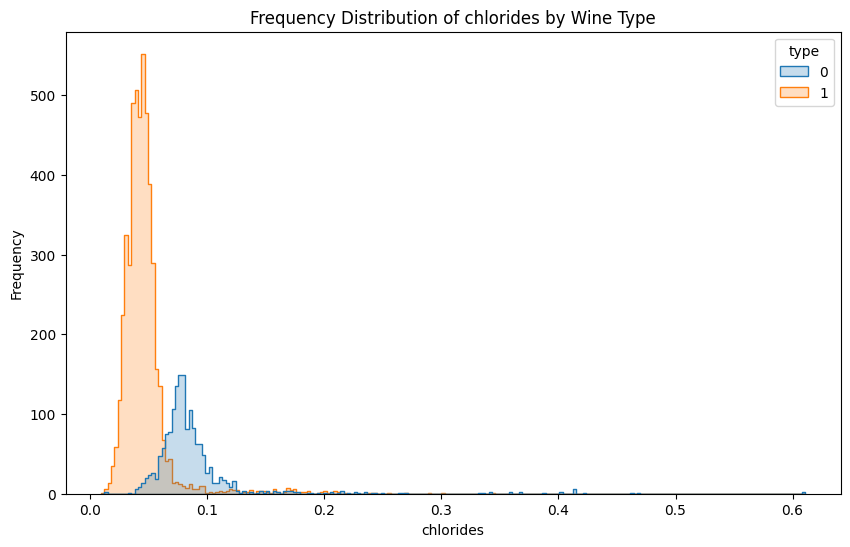

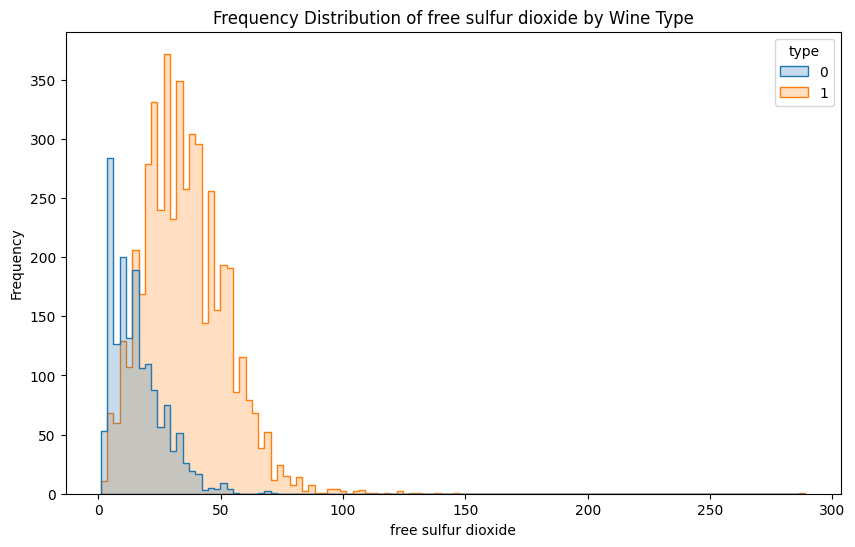

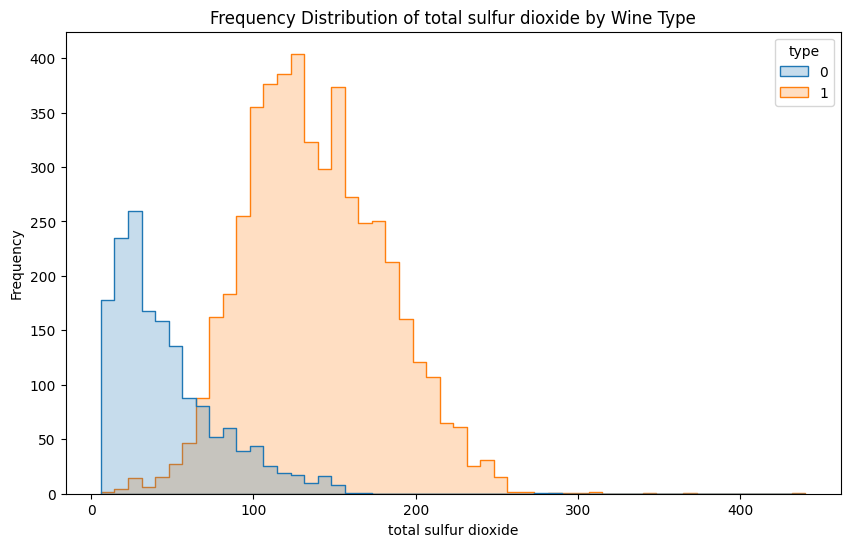

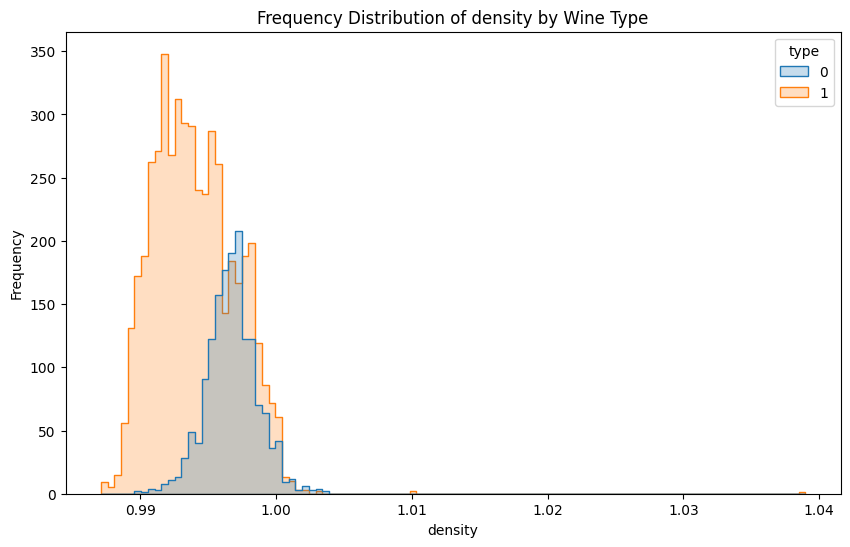

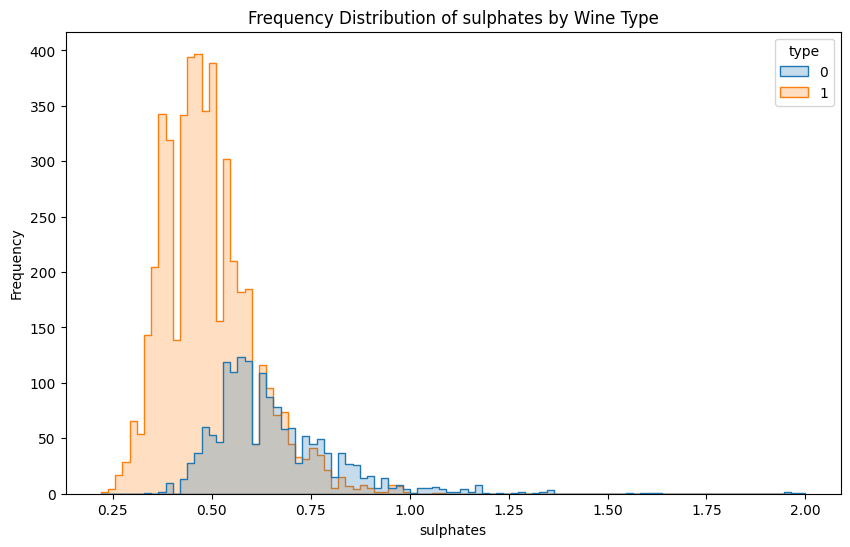

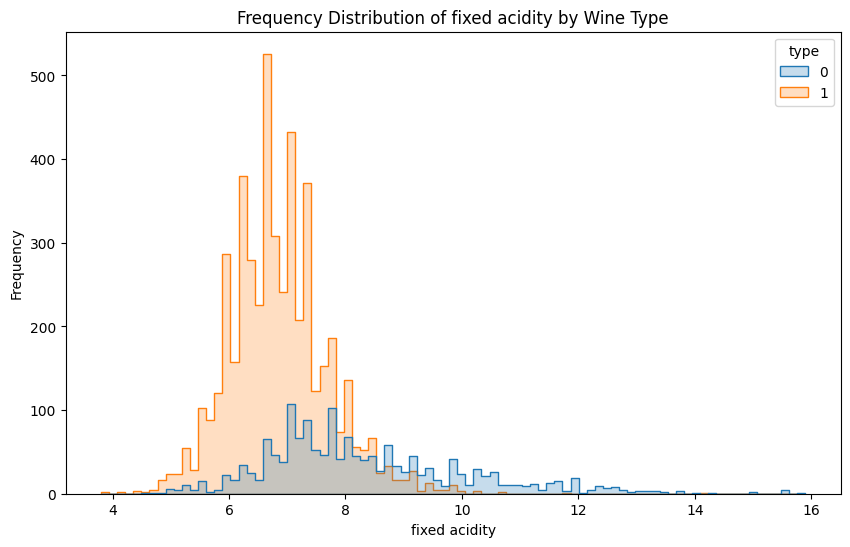

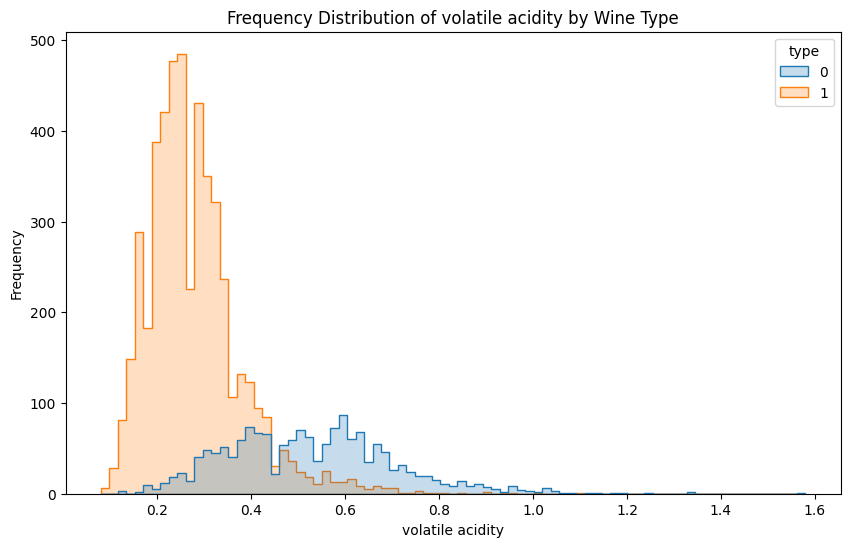

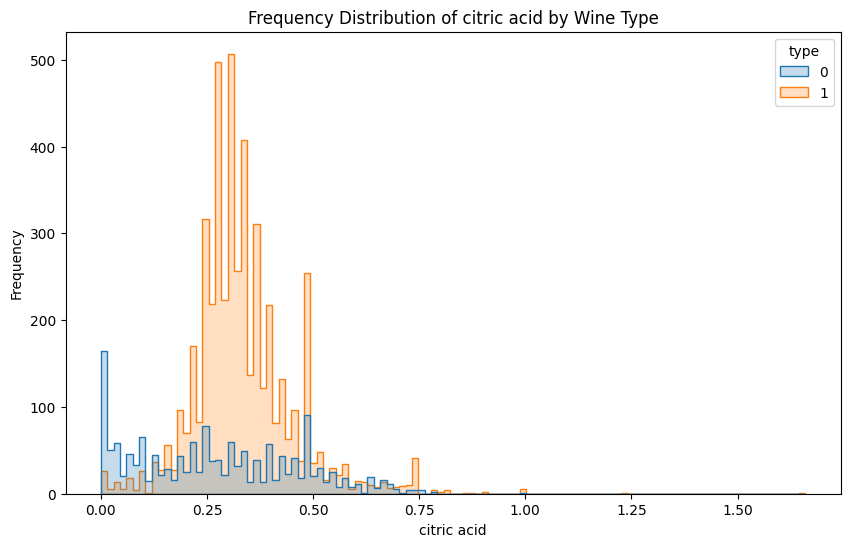

In [27]:
for feature in columns_of_interest:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.histplot(data=merged, x=feature, hue='type', element='step', common_norm=False)
    plt.title(f'Frequency Distribution of {feature} by Wine Type')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

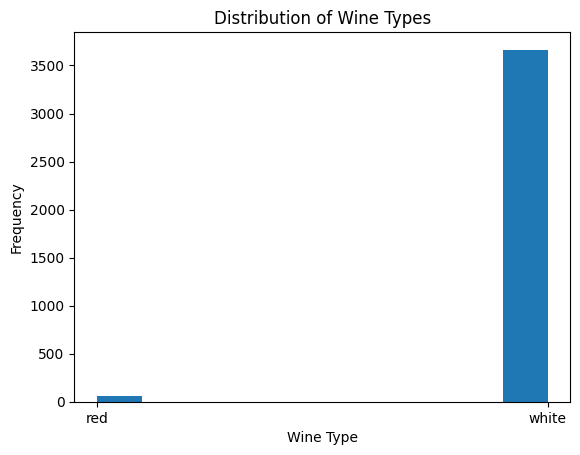

In [12]:
plt.hist(merged['type'], histtype = 'bar')
plt.xlabel('Wine Type')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Types')
plt.show()

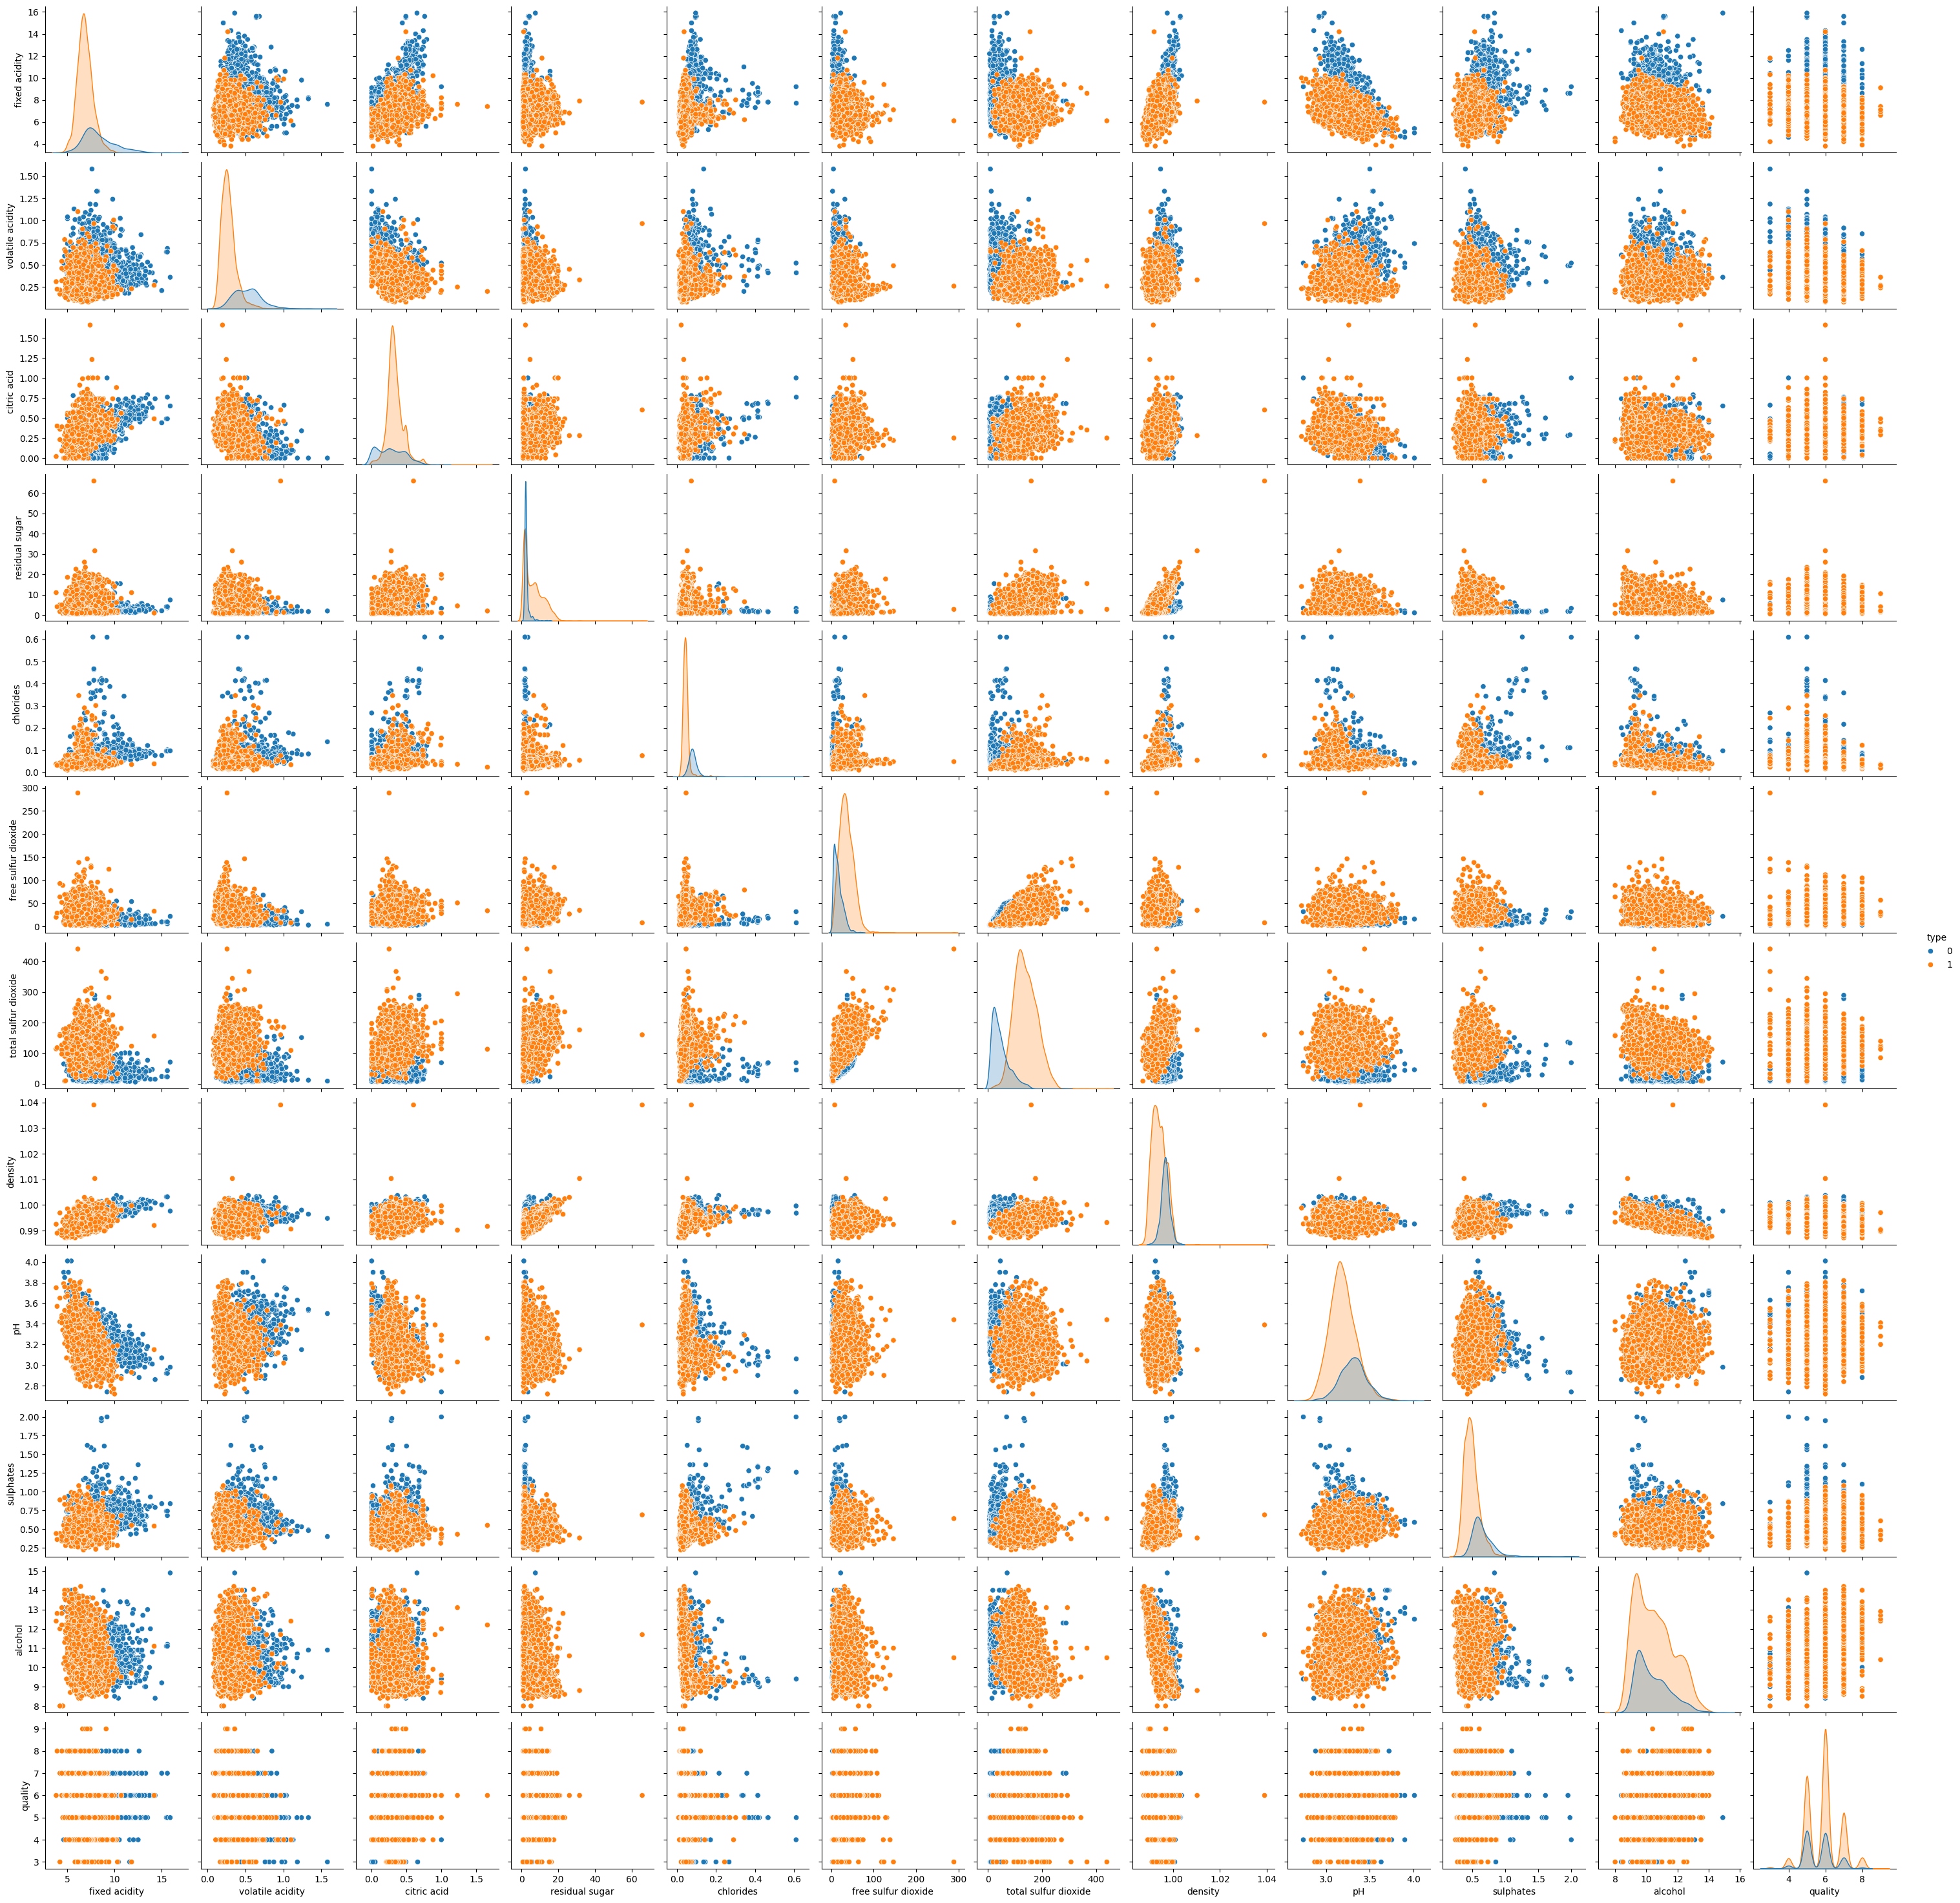

In [26]:
#pairplot
sns.pairplot(merged, hue = 'type')

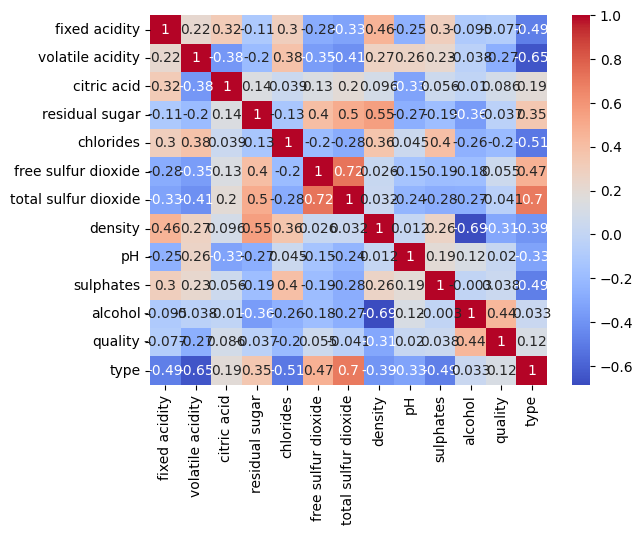

In [23]:
#correlation matrix
corr_matrix = merged.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()